## Лабораторна №3 
## Чєвтаєв

In [105]:
import pandas as pd
import numpy as np
 
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

In [106]:
col_names = ['Age', 'Year of operation', 'Number of positive axillary nodes', 'Survival status']
initdata = pd.read_table('Documents/classdata/haberman.data', sep=',', names=col_names)
initdata.head()

,Age,Year of operation,Number of positive axillary nodes,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [107]:
initdata.describe()

,Age,Year of operation,Number of positive axillary nodes,Survival status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [108]:
corr = initdata.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Year of operation,Number of positive axillary nodes,Survival status
Age,1,0.0895294,-0.0631761,0.0679503
Year of operation,0.0895294,1,-0.00376447,-0.00476818
Number of positive axillary nodes,-0.0631761,-0.00376447,1,0.286768
Survival status,0.0679503,-0.00476818,0.286768,1


In [109]:
response = initdata['Survival status']
inputvars = initdata.drop(['Survival status'], axis=1)
inputvars.head()

,Age,Year of operation,Number of positive axillary nodes
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4


In [110]:
# Створемо данні із фактор змінною
data_with_factor = initdata.copy(deep=True)
# перетворюємо Age на фактор змінну
def age_factor(x):
    if  x < 30:
        return 0
    elif 30 <= x <= 60:
        return 1
    else:
        return 2

data_with_factor['Age'] = initdata['Age'].apply(age_factor)
factorresponse = data_with_factor['Survival status']
factorinputvars = data_with_factor.drop(['Survival status'], axis=1)


In [111]:
#Створимо данні за фактор змінною

initdata.head()
input3060 = initdata.loc[(initdata['Age'] > 30) & (initdata['Age'] < 60)]
response3060 = input3060['Survival status']
input3060 = input3060.drop(['Survival status','Age'],axis=1)

input3060.head()

input60 = initdata.loc[(initdata['Age'] > 60)]
response60 = input60['Survival status']
input60 = input60.drop(['Survival status','Age'],axis=1)

# Вирішуюче дерево

In [112]:
def decision_tree(data,target):
    """Вирішуюче дерево з оцінкою моделі"""
    
    dectree = tree.DecisionTreeClassifier()
    scores = cross_val_score(dectree, data, target, cv=10)
    
    print("Cross-val score: {}".format(scores.mean()))

data = [inputvars, factorinputvars, input3060, input60]
target = [response, factorresponse, response3060, response60]

for i in range(len(data)):
    decision_tree(data[i], target[i])

Cross-val score: 0.5890793010752688
Cross-val score: 0.696364247311828
Cross-val score: 0.7068511198945981
Cross-val score: 0.6257936507936508


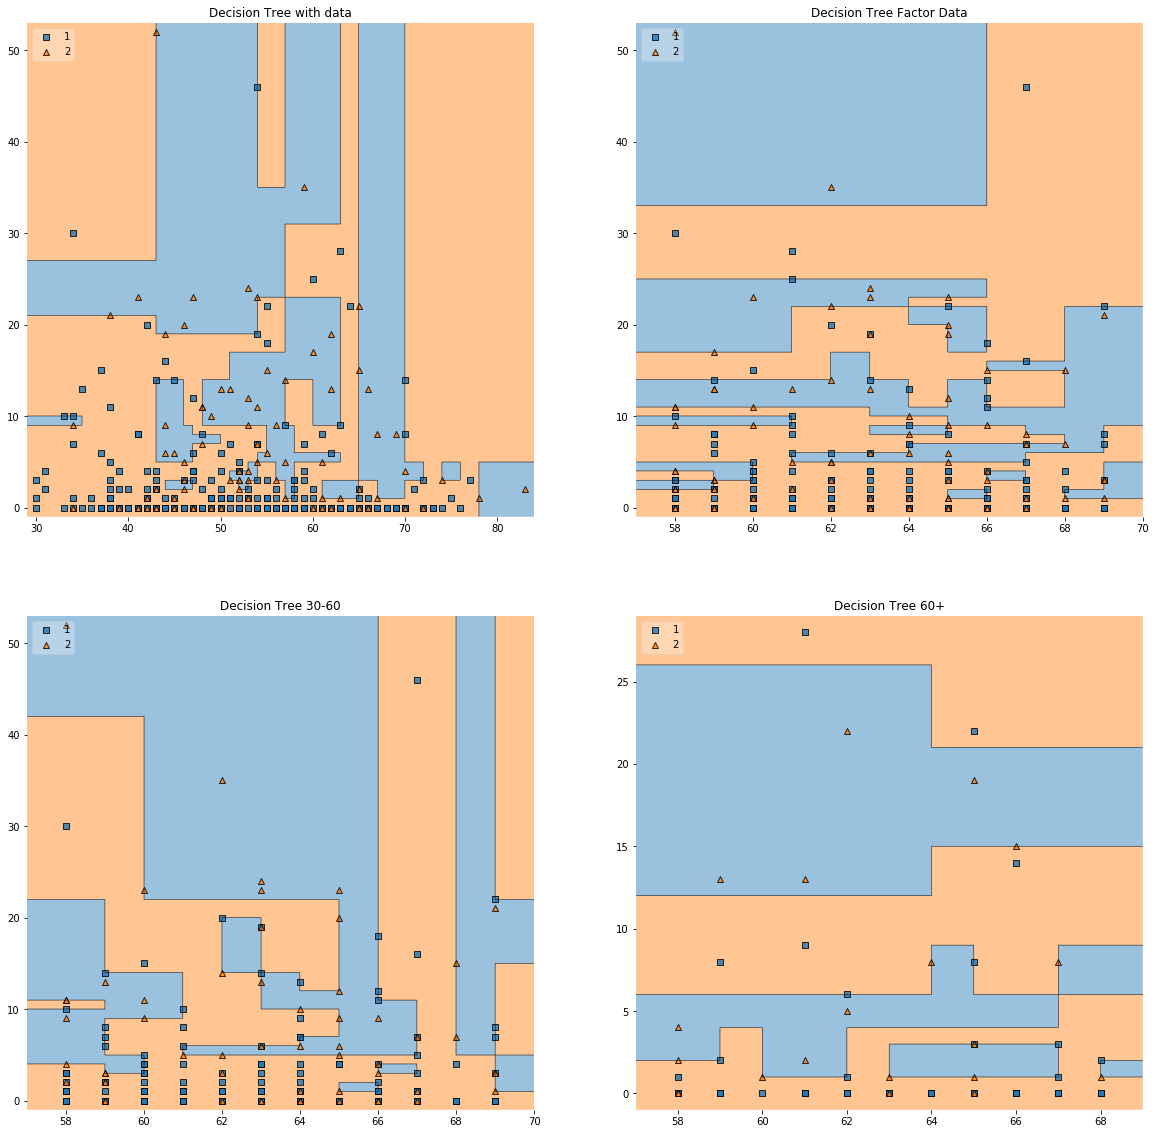

In [113]:
dectree1 = tree.DecisionTreeClassifier()
dectree2 = tree.DecisionTreeClassifier()
dectree3 = tree.DecisionTreeClassifier()
dectree4 = tree.DecisionTreeClassifier()

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,20))

data = [(inputvars.iloc[:,[0,2]].values, response.values), 
        (factorinputvars.iloc[:,[1,2]].values, factorresponse.values), 
        (input3060.iloc[:,[0,1]].values, response3060.values), 
        (input60.iloc[:,[0,1]].values, response60.values)]

labels = ['Decision Tree with data', 'Decision Tree Factor Data', 'Decision Tree 30-60', 'Decision Tree 60+']

for model, lab, modelinput, grd in zip([dectree1, dectree2, dectree3, dectree4],
                         labels,
                         data,
                         itertools.product([0, 1], repeat=2)):

    model.fit(modelinput[0], modelinput[1])
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=modelinput[0], y=modelinput[1], clf=model, legend=2)
    plt.title(lab)

plt.show()

# Бустінг

In [114]:
def adaboost(inputvarse, response):
    """Adaboost з оцінкою моделі"""
    params = {
        'n_estimators':[1,2,3,4,5,6,8,10,12,16,100,150,200,250,500]
    }
    
    adaboostmodel = GridSearchCV(AdaBoostClassifier(), params, cv=5).fit(inputvarse, response)
    
    n_estimators = adaboostmodel.best_params_['n_estimators']
    
    scores = cross_val_score(AdaBoostClassifier(n_estimators=n_estimators), inputvarse, response, cv=5)
    
    print("Score: {}\t n_estimators: {}".format(scores.mean(), n_estimators))

In [115]:
data = [inputvars, factorinputvars, input3060, input60]
target = [response, factorresponse, response3060, response60]

for i in range(len(data)):
    adaboost(data[i], target[i])

Score: 0.7353252247488102	 n_estimators: 1
Score: 0.7386039132734004	 n_estimators: 2
Score: 0.7277801268498942	 n_estimators: 6
Score: 0.74	 n_estimators: 1


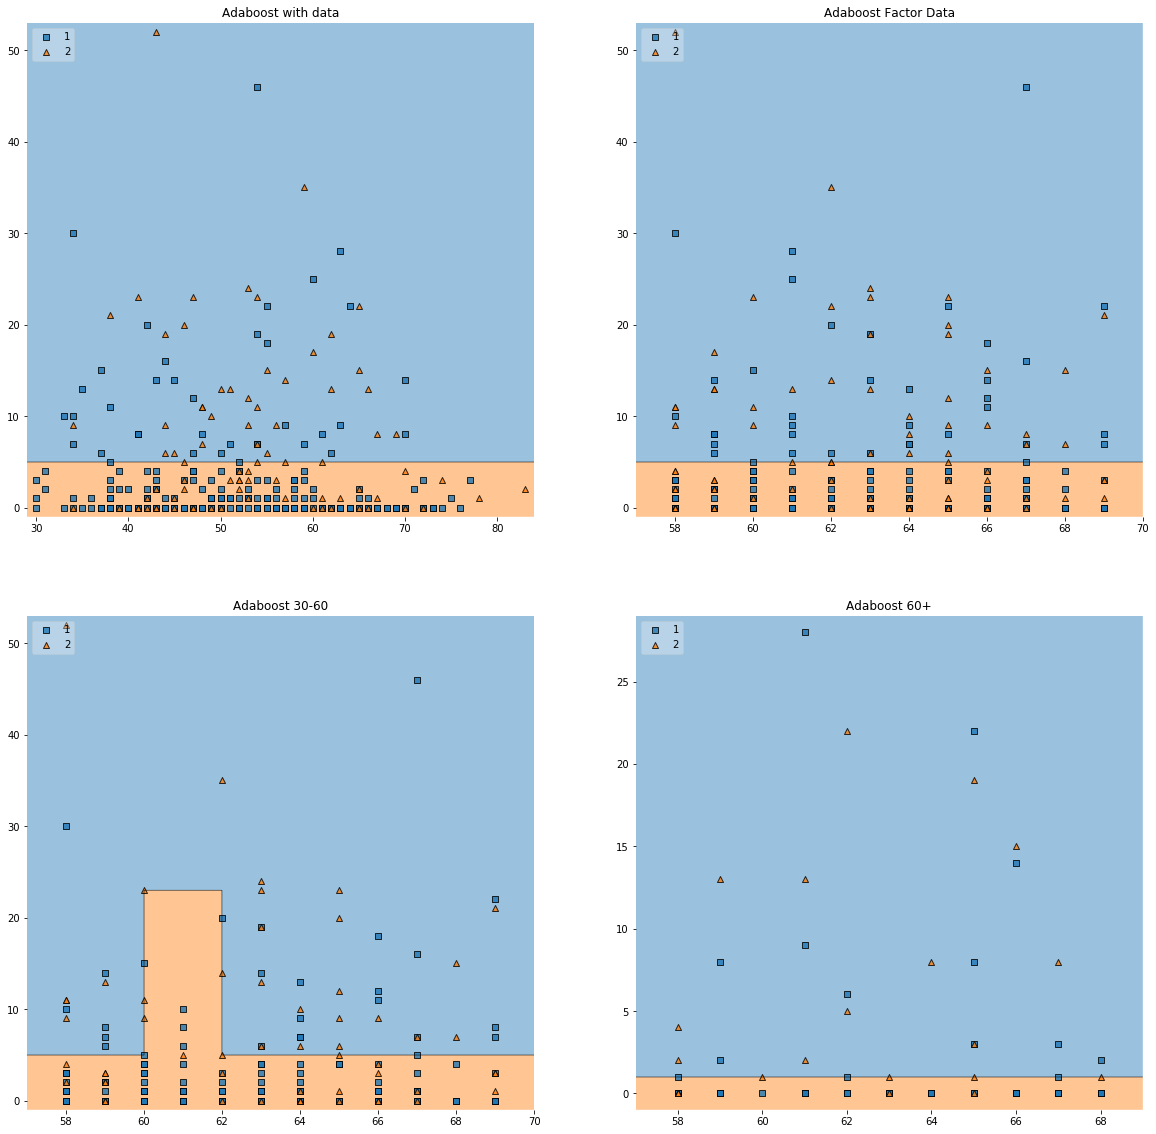

In [116]:
adaboost1 = AdaBoostClassifier(n_estimators=1)
adaboost2 = AdaBoostClassifier(n_estimators=2)
adaboost3 = AdaBoostClassifier(n_estimators=6)
adaboost4 = AdaBoostClassifier(n_estimators=1)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,20))

data = [(inputvars.iloc[:,[0,2]].values, response.values), 
        (factorinputvars.iloc[:,[1,2]].values, factorresponse.values), 
        (input3060.iloc[:,[0,1]].values, response3060.values), 
        (input60.iloc[:,[0,1]].values, response60.values)]

labels = ['Adaboost with data', 'Adaboost Factor Data', 'Adaboost 30-60', 'Adaboost 60+']

for model, lab, modelinput, grd in zip([adaboost1, adaboost2, adaboost3, adaboost4],
                         labels,
                         data,
                         itertools.product([0, 1], repeat=2)):

    model.fit(modelinput[0], modelinput[1])
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=modelinput[0], y=modelinput[1], clf=model, legend=2)
    plt.title(lab)

plt.show()

# Випадковий ліс

In [123]:
def randomforest(data,target):
    """Випадковий ліс з оцінкою моделі"""
    params = {'n_estimators':[1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 20,25,30, 40, 50,100],
                'max_depth':[None,1,2,3,4,5,6,8,10,12,15]}
    
    randomforestmodel = GridSearchCV(RandomForestClassifier(), params, cv=5).fit(data, target)
    
    n_estimators = randomforestmodel.best_params_['n_estimators']
    
    max_depth = randomforestmodel.best_params_['max_depth']
    
    scores = cross_val_score(RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth), data, target, cv=5)

    print("Score: {}\t n_estimators: {}\t max_depth: {}".format(scores.mean(),n_estimators, max_depth ))

In [124]:
data = [inputvars, factorinputvars, input3060, input60]
target = [response, factorresponse, response3060, response60]

for i in range(len(data)):
    randomforest(data[i], target[i])

Score: 0.7156530936012692	 n_estimators: 20	 max_depth: 5
Score: 0.6699101004759387	 n_estimators: 5	 max_depth: 5
Score: 0.691512802443035	 n_estimators: 10	 max_depth: 8
Score: 0.595	 n_estimators: 3	 max_depth: None


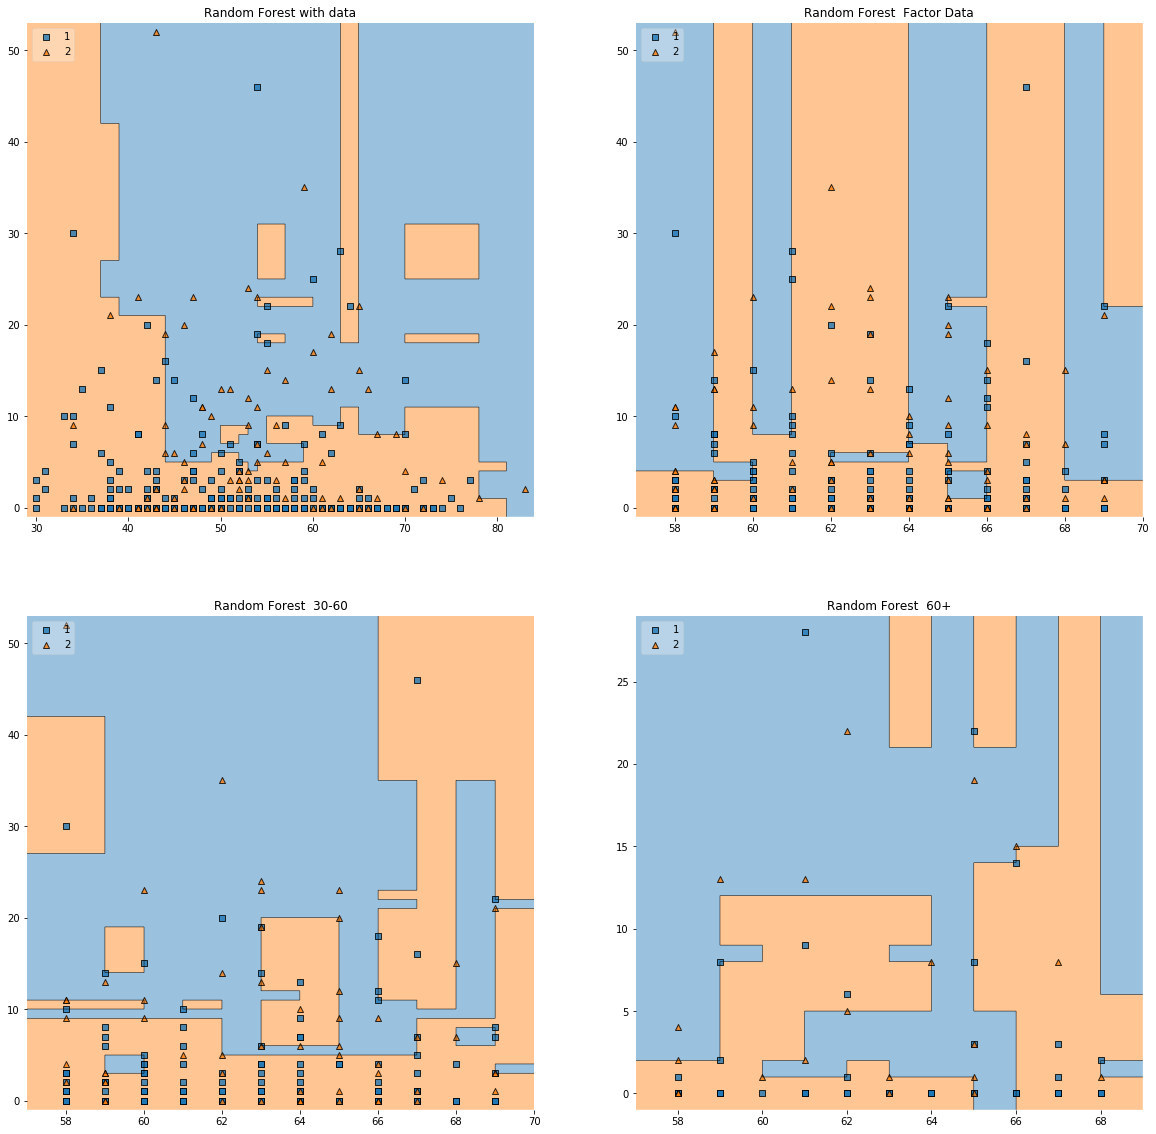

In [125]:
randomforest1 = RandomForestClassifier(n_estimators=10, max_depth=5)
randomforest2 = RandomForestClassifier(n_estimators=3, max_depth=5)
randomforest3 = RandomForestClassifier(n_estimators=20, max_depth=5)
randomforest4 = RandomForestClassifier(n_estimators=3, max_depth=None)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,20))

data = [(inputvars.iloc[:,[0,2]].values, response.values), 
        (factorinputvars.iloc[:,[1,2]].values, factorresponse.values), 
        (input3060.iloc[:,[0,1]].values, response3060.values), 
        (input60.iloc[:,[0,1]].values, response60.values)]

labels = ['Random Forest with data', 'Random Forest  Factor Data', 'Random Forest  30-60', 'Random Forest  60+']

for model, lab, modelinput, grd in zip([randomforest1, randomforest2, randomforest3, randomforest4],
                         labels,
                         data,
                         itertools.product([0, 1], repeat=2)):

    model.fit(modelinput[0], modelinput[1])
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=modelinput[0], y=modelinput[1], clf=model, legend=2)
    plt.title(lab)

plt.show()